# **<center> An application of the Engle-Granger Two-Step procedure to financial time series </center>**


## Import libraries

In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats


## Exploiting a cointegration situation

### Loading time series from yfinance: 

>GDX : *VanEck Gold Miners ETF*
>
>GOAU : *US Global GO GOLD and Precious Metal Miners ETF*

In [57]:
gdx_data = yf.download("GDX", start="2018-01-01", end="2023-01-01")["Adj Close"]
goau_data = yf.download("GOAU", start="2018-01-01", end="2023-01-01")["Adj Close"]

# Le code Python ci-dessus utilise la bibliothèque yfinance pour télécharger les données d'ajustement des clôtures pour deux tickers, 'GDX' et 'GOAU'. à partir de Yahoo Finance.
# Les données sont extraites pour la période allant de janvier 2018 à janvier 2023.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [58]:
data_stocks = pd.DataFrame({"GDX": gdx_data, "GOAU": goau_data})

#The line of code creates a DataFrame named 'stocks' using the pandas library, containing the time series data for the tickers 'GDX' and 'GOAU' downloaded earlier.
#Each column of the DataFrame represents the corresponding closing adjustment prices for the two assets.

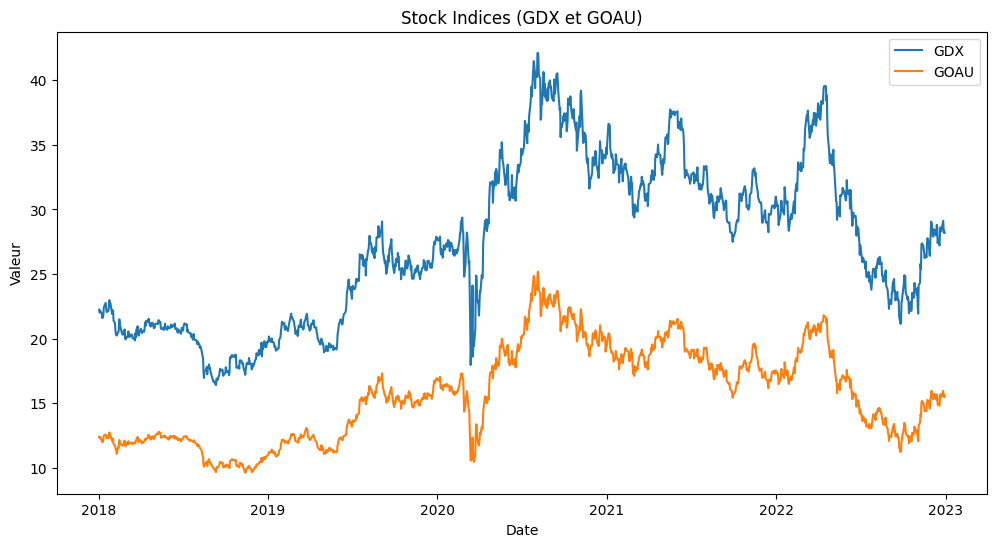

In [59]:
#plot stock indeces
plt.figure(figsize=(12, 6))
plt.plot(data_stocks["GDX"], label="GDX")
plt.plot(data_stocks["GOAU"], label="GOAU")
plt.title("Stock Indices (GDX et GOAU)")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend()
plt.show()
#use Matplotlib to plot the corresponding time series. The graph displays the index values over time.

### Engle-Granger Two-Step Method

The code performs the Augmented Dickey-Fuller (ADF) test to assess the stationarity of the time series 'GDX' and 'GOAU'.

It prints the ADF statistics, p-values, and the result of the stationarity test for each series.

Stationarity is evaluated by comparing the p-value to the threshold of 0.05, where a lower p-value indicates stationarity.

In [60]:
for stock in data_stocks.columns:
    adf_statistic, adf_pvalue, _, _, _, _ = sm.tsa.adfuller(data_stocks[stock])
    print(f"\nTest de Dickey-Fuller for {stock}:")
    print(f"ADF Statistic: {adf_statistic}")
    print(f"p-value: {adf_pvalue}")
    print(
        f'Result of the stationarity test: {"Stationary" if adf_pvalue < 0.05 else "Non-Stationary"}'
    )


Test de Dickey-Fuller for GDX:
ADF Statistic: -1.9801314553008755
p-value: 0.29535213086724255
Result of the stationarity test: Non-Stationary

Test de Dickey-Fuller for GOAU:
ADF Statistic: -1.8484934471871726
p-value: 0.35666543062276046
Result of the stationarity test: Non-Stationary


This code performs the Augmented Dickey-Fuller (ADF) test on differencing of the time series 'GDX' and 'GOAU'.

It prints the ADF statistics, p-values, critical values, and the result of the stationarity test for each differenced series.

Stationarity is evaluated by comparing the p-value to the threshold of 0.05, where a lower p-value indicates stationarity.

In [61]:
for stock in data_stocks.columns:
    adf_result = adfuller(data_stocks[stock].diff().dropna(), autolag="AIC")

    print(f"\nTest de Dickey-Fuller pour difference{stock}:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Critical Values: {adf_result[4]}")
    print(
        f'Result of the stationarity test: {"Stationary" if adf_result[1] < 0.05 else "Non-Stationary"}'
    )


Test de Dickey-Fuller pour differenceGDX:
ADF Statistic: -17.922556034246362
p-value: 2.902596063505663e-30
Critical Values: {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}
Result of the stationarity test: Stationary

Test de Dickey-Fuller pour differenceGOAU:
ADF Statistic: -21.70633379017689
p-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}
Result of the stationarity test: Stationary


This code generates a plot of the differences between the time series 'GDX' and 'GOAU'.

Lagged differences are calculated using the diff() method, and missing values are dropped with dropna().

The plot displays the differences over time, with labels for each series.

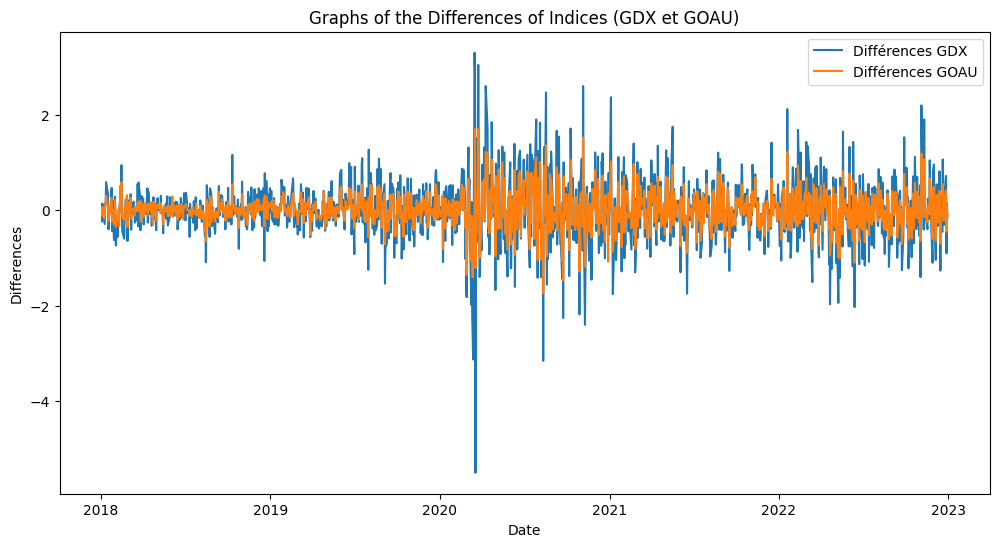

In [62]:
# Check the stationarity of the differences.
plt.figure(figsize=(12, 6))
plt.plot(data_stocks['GDX'].diff().dropna(), label='Différences GDX')
plt.plot(data_stocks['GOAU'].diff().dropna(), label='Différences GOAU')
plt.title('Graphs of the Differences of Indices (GDX et GOAU)')
plt.xlabel('Date')
plt.ylabel('Differences')
plt.legend()    
plt.show()

This code performs a simple linear regression where 'GOAU' depends on 'GDX'.

It calculates the residuals to assess the difference between the observed values and the values predicted by the model.

In [63]:
# Step 1: Linear Regression
X = sm.add_constant(data_stocks['GDX'])
model = sm.OLS(data_stocks['GOAU'], X).fit()
alpha, beta = model.params

# Calculate residuals
residuals = data_stocks['GOAU'] - alpha - beta * data_stocks['GDX']

This code performs an Augmented Dickey-Fuller (ADF) test on the residuals of the regression to assess their stationarity.

Then, it tests for cointegration by checking if the p-value of the ADF test is less than 0.05.

If so, the result of the cointegration test is positive, indicating a long-term relationship between the series.  

In [64]:
# Step 2: Test the residuals for unit root
adf_statistic, adf_pvalue, _, _, _, _ = sm.tsa.adfuller(residuals)
print(f'ADF Statistic for Residuals: {adf_statistic}')
print(f'p-value for ADF Test: {adf_pvalue}')

# Test for cointegration
cointegration_test_result = adf_pvalue < 0.05
print(f'Cointegration Test Result: {cointegration_test_result}')

ADF Statistic for Residuals: -3.6093715379951865
p-value for ADF Test: 0.00558437096167715
Cointegration Test Result: True


The code creates a new DataFrame 'df' by dropping missing values from the original DataFrame 'data_stocks'.

Then, it creates two new series, 'lagged_gdx' and 'lagged_goau', which are the lagged values of one period in the past for the columns 'GDX' and 'GOAU', respectively.

Finally, it creates a new DataFrame 'df_diff' representing the difference between successive values of 'df'.

In [65]:
# Step 2: Creating the Error Correction Model (ECM)
df=data_stocks
df.dropna(inplace=True)
lagged_gdx = df['GDX'].shift(1).dropna()
lagged_goau = df['GOAU'].shift(1).dropna()
df_diff = df.diff().dropna()

The code creates a DataFrame called independent_vars with explanatory variables to estimate an Error Correction Model (ECM) between the differences of 'GOAU' and lagged values of 'GDX', as well as lagged values of 'GOAU'.

Then, it utilizes these variables to fit the ECM model using the statsmodels library.

In [66]:
# Error Correction Model (ECM) Estimation
# Create a new DataFrame containing the independent variables
independent_vars = pd.DataFrame(
    {"Delta_GDX": df_diff["GDX"], "Lagged_GDX": lagged_gdx, "Lagged_GOAU": lagged_goau}
)

# Model estimation for the Error Correction Model (ECM)
ecm_model = sm.OLS(df_diff["GOAU"], sm.add_constant(independent_vars)).fit()

In [67]:
# Display the results of the Error Correction Model (ECM)
print(ecm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   GOAU   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     2785.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:18:27   Log-Likelihood:                 764.02
No. Observations:                1258   AIC:                            -1520.
Df Residuals:                    1254   BIC:                            -1499.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0034      0.017     -0.203      

In [68]:
ecm_model.params

const         -0.003410
Delta_GDX      0.511683
Lagged_GDX     0.019152
Lagged_GOAU   -0.033114
dtype: float64

In [69]:
# Print the estimated coefficients
print("a (Delta_GDX):", ecm_model.params['Delta_GDX'])
print("b (Lagged_GOAU):", ecm_model.params['Lagged_GOAU'])
print("c (Lagged_GDX):", ecm_model.params['Lagged_GDX'])
print("d (const):", ecm_model.params['const'])


a (Delta_GDX): 0.5116828630134932
b (Lagged_GOAU): -0.03311359783552705
c (Lagged_GDX): 0.019152111860875634
d (const): -0.003410496009406017


This code prints the p-value associated with the explanatory variable 'Delta_GDX' in the fitted Error Correction Model (ECM).

This helps evaluate the statistical significance of this variable in the ECM model.

In [70]:
# Display the results of the ECM regression
print(f'P-value for the ECM regression: {ecm_model.pvalues.iloc[1]}')

P-value for the ECM regression: 0.0


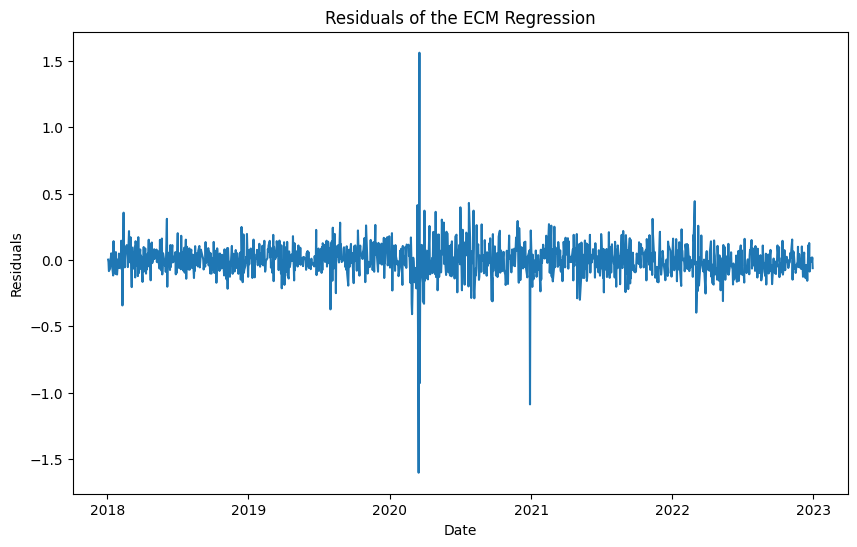

In [71]:
# Plot the residuals of the ECM regression
residuals_ecm = df_diff['GOAU'] - ecm_model.params['Delta_GDX'] *df_diff['GDX']-ecm_model.params['Lagged_GOAU']*lagged_goau - ecm_model.params['Lagged_GDX']*lagged_gdx-ecm_model.params['const']
plt.figure(figsize=(10, 6))
plt.plot(residuals_ecm)
plt.title('Residuals of the ECM Regression')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

This code calculates and prints the autocorrelation of the residuals of the Error Correction Model (ECM) for lags from 1 to 10.

This provides information about the serial correlation of residuals at different lags in time.

In [72]:
# Calculation of autocorrelation of residuals for multiple lags
lags = 10
autocorr_residus_ecm_multi_lags = [residuals_ecm.autocorr(lag=i) for i in range(1, lags+1)]
print(f'Autocorrélation des résidus de l\'ECM pour les lags 1 à {lags} :')
print(autocorr_residus_ecm_multi_lags)

Autocorrélation des résidus de l'ECM pour les lags 1 à 10 :
[-0.1827244519926651, -0.09614161846150976, 0.09382172059119108, 0.024147512648896596, 0.03840694210421125, 0.04113004234174503, 0.03345828714258566, -0.030061078785977004, 0.06677353104106717, -0.00029290518722992936]


## Non-cointegration situation


### Loading time series from yfinance: 

>AAPL : Apple Inc
>
>MSFT : Microsoft Corp

In [73]:
# Download historical data for AAPL and MSFT
aapl = yf.download('AAPL', start='2018-01-01', end='2023-01-01')['Adj Close']
msft = yf.download('MSFT', start='2018-01-01', end='2023-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


The line of code creates a DataFrame named 'stocks' using the pandas library, containing the time series data for the tickers 'AAPL' and 'MSFT' downloaded earlier.

Each column of the DataFrame represents the corresponding closing adjustment prices for the two assets.

In [74]:
data_stocks_2 = pd.DataFrame({"AAPL": gdx_data, "MSFT": goau_data})

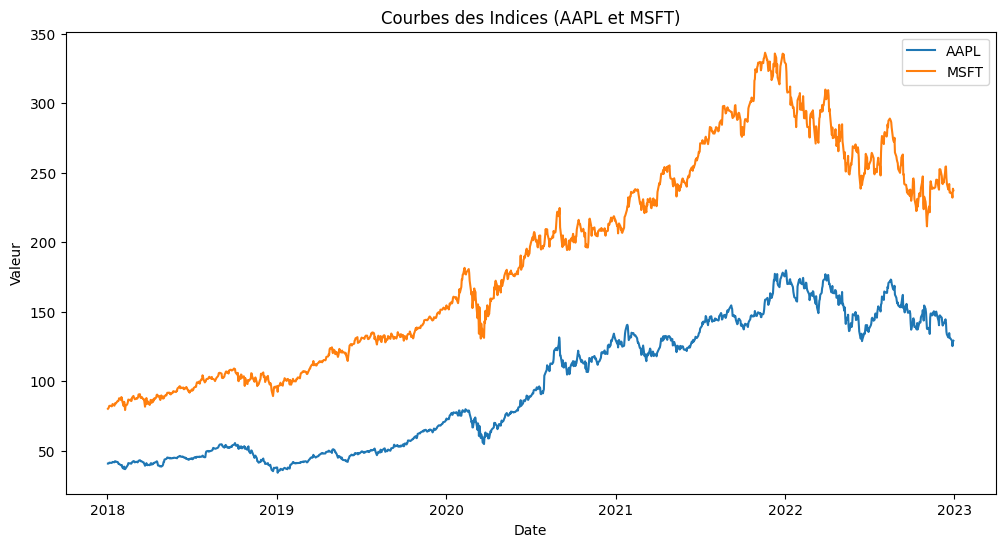

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(aapl, label='AAPL')
plt.plot(msft, label='MSFT')
plt.title('Courbes des Indices (AAPL et MSFT)')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()

### Engle-Granger Two-Step

This code performs a Dickey-Fuller test for each index present in the DataFrame 'data_stocks'.

It then prints the test statistics, p-values, and indicates whether the time series is stationary or not based on the threshold of 0.05.

In [76]:
# Dickey-Fuller test for each index
for stock in data_stocks_2.columns:
    adf_statistic, adf_pvalue, _, _, _, _ = sm.tsa.adfuller(data_stocks_2[stock])
    print(f'\nTest de Dickey-Fuller pour {stock}:')
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {adf_pvalue}')
    print(f'Résultat du test de stationnarité: {"Stationnaire" if adf_pvalue < 0.05 else "Non stationnaire"}')


Test de Dickey-Fuller pour AAPL:
ADF Statistic: -1.9801314553008755
p-value: 0.29535213086724255
Résultat du test de stationnarité: Non stationnaire

Test de Dickey-Fuller pour MSFT:
ADF Statistic: -1.8484934471871726
p-value: 0.35666543062276046
Résultat du test de stationnarité: Non stationnaire


this code performs a simple linear regression using the Statsmodels library to fit a linear model between the data of Apple (AAPL) and Microsoft (MSFT) in the DataFrame data_stocks.

it then prints the summary of the linear regression model, which includes information such as coefficients, test statistics, and p-values.

In [77]:
# simple linear regression
X = sm.add_constant(data_stocks_2['AAPL'])
model = sm.OLS(data_stocks_2['MSFT'], X).fit()
print('\nRégression linéaire simple:')
print(model.summary())


Régression linéaire simple:
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 5.920e+04
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:18:30   Log-Likelihood:                -971.21
No. Observations:                1259   AIC:                             1946.
Df Residuals:                    1257   BIC:                             1957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0393  

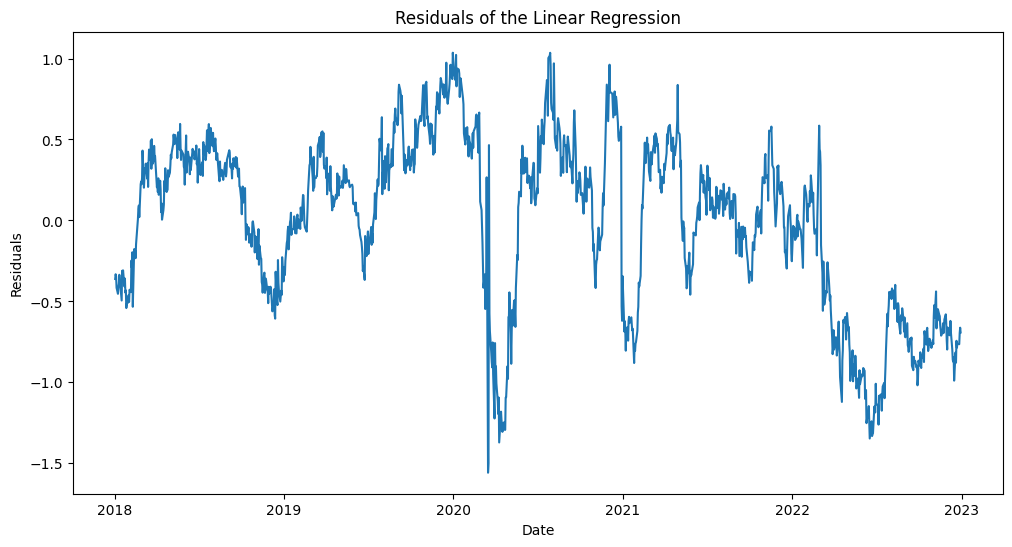

In [78]:
# analyse the residuals
residuals = data_stocks_2['MSFT'] - model.params['AAPL'] * data_stocks_2['AAPL'] - model.params['const']
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of the Linear Regression')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

This code performs the Dickey-Fuller test for the residuals of the simple linear regression and prints the test result:

including the ADF statistic, p-value, and verdict on the stationarity of the residuals.

In [79]:
# Dickey-Fuller test for the residuals
adf_statistic_resid, adf_pvalue_resid, _, _, _, _ = sm.tsa.adfuller(residuals)
print("\nDickey-Fuller test for residuals of the simple linear regression:")
print(f"ADF Statistic: {adf_statistic_resid}")
print(f"p-value: {adf_pvalue_resid}")
print(
    f'Stationnarity test result: {"Stationary" if adf_pvalue_resid < 0.05 else "Non_Stationary"}'
)


Dickey-Fuller test for residuals of the simple linear regression:
ADF Statistic: -3.6093715379951843
p-value: 0.00558437096167719
Stationnarity test result: Stationary


In [80]:
#Modeling Differences
delta_y = data_stocks_2["AAPL"].diff().dropna()
delta_x = data_stocks_2["MSFT"].diff().dropna()

#Regression of Differences
differences_model = sm.OLS(delta_y, sm.add_constant(delta_x)).fit()

#Display the results of the regression of differences
print(differences_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     8206.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:18:32   Log-Likelihood:                -1.8331
No. Observations:                1258   AIC:                             7.666
Df Residuals:                    1256   BIC:                             17.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.007      0.081      0.9

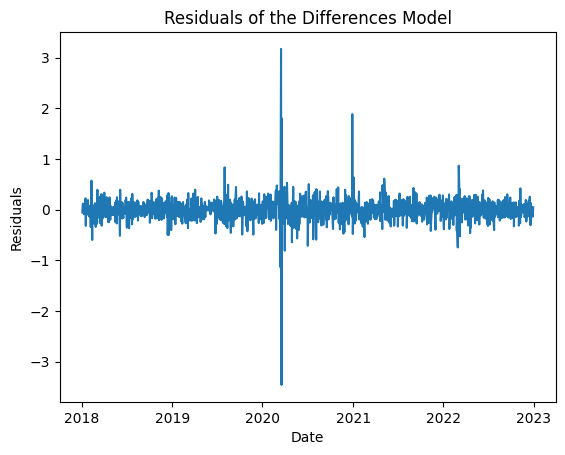

In [81]:
#Plot the residuals of the regression of differences
residuals_diff = delta_y - differences_model.params.iloc[1] * delta_x
plt.plot(residuals_diff)
plt.title("Residuals of the Differences Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

In [82]:
for stock in data_stocks_2.columns:
    adf_result = adfuller(data_stocks_2[stock].diff().dropna(), autolag="AIC")

print(f"\nDickey-Fuller Test for {stock} Differences:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")
print(
    f'Result of Stationarity Test: {"Stationary" if adf_result[1] < 0.05 else "Non-stationary"}'
)

#Dickey-Fuller Test for the residuals of the differences regression
adf_statistic_diff, adf_pvalue_diff, _, _, _, _ = sm.tsa.adfuller(residuals_diff)
print("\nDickey-Fuller Test for Residuals of Differences Regression:")
print(f"ADF Statistic: {adf_statistic_diff}")
print(f"p-value: {adf_pvalue_diff}")
print(
f'Result of Stationarity Test: {"Stationary" if adf_pvalue_diff < 0.05 else "Non-stationary"}'
)


Dickey-Fuller Test for MSFT Differences:
ADF Statistic: -21.70633379017689
p-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}
Result of Stationarity Test: Stationary

Dickey-Fuller Test for Residuals of Differences Regression:
ADF Statistic: -36.23336669537124
p-value: 0.0
Result of Stationarity Test: Stationary


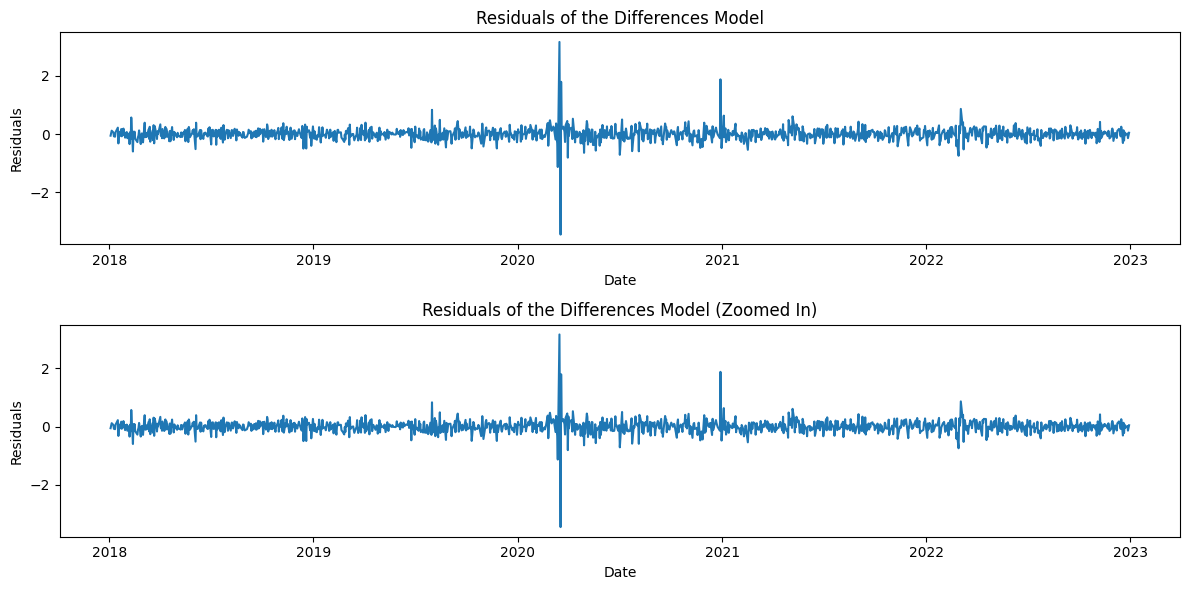

In [83]:
# Plot the residuals of the differences regression.
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals_diff)
plt.title("Residuals of the Differences Model")
plt.xlabel("Date")
plt.ylabel("Residuals")

# Dickey-Fuller test for the residuals of the differences regression
plt.subplot(2, 1, 2)
plt.plot(data_stocks.index[1:], residuals_diff)
plt.title("Residuals of the Differences Model (Zoomed In)")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()